In [ ]:
!pip install scanpy
!pip install anndata
!pip install leidenalg
!pip install louvain
!pip install matplotlib
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install scipy
!pip install seaborn
!pip install shap pdpbox
!pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 569.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install -U cellxgene-census

In [ ]:
import cellxgene_census

In [ ]:
with cellxgene_census.open_soma() as census:

    # Reads SOMADataFrame as a slice
    cell_metadata = census["census_data"]["homo_sapiens"].obs.read(
        value_filter = "disease in ['Parkinson disease']",
        column_names = ["assay", "cell_type", "tissue", "tissue_general", "suspension_type", "disease", "dataset_id"]
    )

    # Concatenates results to pyarrow.Table
    cell_metadata = cell_metadata.concat()

    # Converts to pandas.DataFrame
    cell_metadata = cell_metadata.to_pandas()

    print(cell_metadata)

The "stable" release is currently 2025-01-30. Specify 'census_version="2025-01-30"' in future calls to open_soma() to ensure data consistency.
INFO:cellxgene_census:The "stable" release is currently 2025-01-30. Specify 'census_version="2025-01-30"' in future calls to open_soma() to ensure data consistency.


             assay                          cell_type  \
0        10x 3' v3                   endothelial cell   
1        10x 3' v3                   endothelial cell   
2        10x 3' v3                   endothelial cell   
3        10x 3' v3                   endothelial cell   
4        10x 3' v3                   endothelial cell   
...            ...                                ...   
1786197  10x 3' v3                   GABAergic neuron   
1786198  10x 3' v3                          astrocyte   
1786199  10x 3' v3               glutamatergic neuron   
1786200  10x 3' v3  central nervous system macrophage   
1786201  10x 3' v3                    oligodendrocyte   

                                 tissue tissue_general suspension_type  \
0        substantia nigra pars compacta          brain         nucleus   
1        substantia nigra pars compacta          brain         nucleus   
2        substantia nigra pars compacta          brain         nucleus   
3        substantia

In [ ]:
# pull out the unique dataset ids
unique_ids = cell_metadata['dataset_id'].unique()
unique_ids

['f5be4b96-f5a3-4c3d-84ac-6f69daf744d5', '4dd1cd23-fc4d-4fd1-9709-602540f3ca6f', 'f8d8b443-bca6-4c3c-9042-669dfb7f8030', '07760522-707a-4a1c-8891-dbd1226d6b27', '2856d06c-0ff9-4e01-bfc9-202b74d0b60f', '5829c7ba-697f-418e-8b98-d605b192dc48', '251b1a7e-d050-4486-8d50-4c2619eb0f46', 'd3cb449b-c2b1-4b50-a7f1-21203535fe61']
Categories (893, object): ['0041b9c3-6a49-4bf7-8514-9bc7190067a7', '00476f9f-ebc1-4b72-b541-32f912ce36ea',
                           '00593d17-0693-4646-acad-89dbefba11bb', '0087cde2-967d-4f7c-8e6e-40e4c9ad1891', ...,
                           'ff45e623-7f5f-46e3-b47d-56be0341f66b', 'ff4cfa86-9c0c-4b7c-abd6-90547657d04f',
                           'ff7d15fa-f4b6-4a0e-992e-fd0c9d088ded', 'ff995299-bf56-4d11-914d-b77949f02fb1']

In [ ]:
import pandas as pd

# group by dataset_id and collect unique cell types
cell_type_lists = (
    cell_metadata
    .groupby('dataset_id')['cell_type']
    .unique()
    .apply(lambda arr: sorted(arr))
)

# display for each dataset_id
for ds_id, cell_types in cell_type_lists.items():
  if len(cell_types) > 0:
    print(f"Dataset {ds_id!r} has {len(cell_types)} cell types:")
    for ct in cell_types:
        print(f"  - {ct}")
    print()


<ipython-input-10-e1f5293354da>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('dataset_id')['cell_type']


Dataset '07760522-707a-4a1c-8891-dbd1226d6b27' has 1 cell types:
  - astrocyte

Dataset '251b1a7e-d050-4486-8d50-4c2619eb0f46' has 1 cell types:
  - neuron

Dataset '2856d06c-0ff9-4e01-bfc9-202b74d0b60f' has 1 cell types:
  - dopaminergic neuron

Dataset '4dd1cd23-fc4d-4fd1-9709-602540f3ca6f' has 1 cell types:
  - oligodendrocyte precursor cell

Dataset '5829c7ba-697f-418e-8b98-d605b192dc48' has 1 cell types:
  - oligodendrocyte

Dataset 'd3cb449b-c2b1-4b50-a7f1-21203535fe61' has 11 cell types:
  - GABAergic neuron
  - astrocyte
  - central nervous system macrophage
  - central nervous system neuron
  - endothelial cell
  - ependymal cell
  - glutamatergic neuron
  - leukocyte
  - mural cell
  - oligodendrocyte
  - oligodendrocyte precursor cell

Dataset 'f5be4b96-f5a3-4c3d-84ac-6f69daf744d5' has 1 cell types:
  - endothelial cell

Dataset 'f8d8b443-bca6-4c3c-9042-669dfb7f8030' has 1 cell types:
  - microglial cell



In [ ]:
import numpy as np
import tiledbsoma
import cellxgene_census

# 1) your big obs-filter
value_filter = (
    "cell_type in ['GABAergic neuron', 'glutamatergic neuron', 'neuron', 'endothelial cell', 'oligodendrocyte', 'oligodendrocyte precursor cell'] "
    "and disease in ['Parkinson disease', 'normal'] "
    "and dataset_id in ["
      "'f5be4b96-f5a3-4c3d-84ac-6f69daf744d5',"
      "'4dd1cd23-fc4d-4fd1-9709-602540f3ca6f',"
      "'f8d8b443-bca6-4c3c-9042-669dfb7f8030',"
      "'07760522-707a-4a1c-8891-dbd1226d6b27',"
      "'2856d06c-0ff9-4e01-bfc9-202b74d0b60f',"
      "'5829c7ba-697f-418e-8b98-d605b192dc48',"
      "'251b1a7e-d050-4486-8d50-4c2619eb0f46',"
      "'d3cb449b-c2b1-4b50-a7f1-21203535fe61'"
    "]"
)
k = 60000

# STEP 1: get all soma_joinids matching your filter
with cellxgene_census.open_soma(census_version="2025-01-30") as census:
    human = census["census_data"]["homo_sapiens"]
    aq = tiledbsoma.AxisQuery(value_filter=value_filter)
    query = human.axis_query(measurement_name="RNA", obs_query=aq)
    all_ids = query.obs_joinids().to_pylist()
    query.close()

all_ids = np.array(all_ids, dtype=str)
if len(all_ids) > k:
    sampled_ids = list(np.random.choice(all_ids, size=k, replace=False))
else:
    sampled_ids = list(all_ids)

# … after your STEP 1 sampling logic …
# sampled_ids is currently a list of str; convert to int:
sampled_ids_int = [int(x) for x in sampled_ids]

# STEP 2: re-fetch into AnnData
with cellxgene_census.open_soma(census_version="2025-01-30") as census:
    adata = cellxgene_census.get_anndata(
        census=census,
        organism="Homo sapiens",
        obs_coords=sampled_ids_int,
        obs_column_names=["assay","cell_type","tissue","tissue_general",
                          "suspension_type","disease","sex","dataset_id"],
        var_column_names=["feature_name","feature_id","feature_type"],
    )

print(adata)



AnnData object with n_obs × n_vars = 60000 × 61888
    obs: 'assay', 'cell_type', 'tissue', 'tissue_general', 'suspension_type', 'disease', 'sex', 'dataset_id'
    var: 'feature_name', 'feature_id', 'feature_type'


In [ ]:
!pip install pybiomart

In [ ]:
query.close()

In [ ]:
adata

AnnData object with n_obs × n_vars = 60000 × 61888
    obs: 'assay', 'cell_type', 'tissue', 'tissue_general', 'suspension_type', 'disease', 'sex', 'dataset_id'
    var: 'feature_name', 'feature_id', 'feature_type'

In [ ]:
# reset variable names from 0,1,2....
adata.var.set_index("feature_name", inplace=True)
print("new var_names:", adata.var_names[:10])


new var_names: Index(['LINC01409', 'NOC2L', 'PERM1', 'ENSG00000272512.1', 'HES4', 'ISG15',
       'AGRN', 'RNF223', 'C1orf159', 'TNFRSF18'],
      dtype='object', name='feature_name')


In [ ]:
from pybiomart import Server  # ✅ Import this
import pandas as pd
### STEP 4: Remove X and Y-linked genes using Ensembl gene annotations
# Connect to Ensembl via pybiomart
server = Server(host='http://www.ensembl.org')
mart = server['ENSEMBL_MART_ENSEMBL']
dataset = mart['hsapiens_gene_ensembl']

# Query Ensembl gene IDs with chromosome information
mapping = dataset.query(attributes=['ensembl_gene_id', 'chromosome_name'])

# Rename to match adata
mapping = mapping.rename(columns={
    'Gene stable ID': 'feature_id',
    'Chromosome/scaffold name': 'chromosome'
})

# Subset to genes in adata
my_ids = adata.var['feature_id'].tolist()
mapping = mapping[mapping['feature_id'].isin(my_ids)]

# Map chromosome info into adata.var
chr_map = dict(zip(mapping['feature_id'], mapping['chromosome']))
adata.var['chromosome'] = adata.var['feature_id'].map(chr_map)

# Filter out genes on chromosomes X and Y
mask = ~adata.var['chromosome'].isin(['X', 'Y'])
adata = adata[:, mask].copy()

print("Remaining chromosomes:", adata.var['chromosome'].unique())
print("Filtered adata shape:", adata.shape)

Remaining chromosomes: ['1' nan '2' '3' '4' '5' '6' '7' '8' '9' '11' '10' '12' '13' '14' '15'
 '16' '17' '18' '20' '19' '22' '21' 'MT' 'GL000219.1' 'KI270734.1'
 'KI270711.1' 'KI270713.1' 'KI270728.1' 'KI270727.1' 'GL000194.1'
 'KI270726.1' 'GL000195.1' 'KI270721.1' 'GL000213.1' 'GL000218.1'
 'KI270731.1' 'GL000009.2' 'GL000220.1' 'KI270733.1' 'GL000216.2'
 'GL000225.1' 'GL000205.2' 'KI270750.1' 'KI270442.1' 'KI270744.1']
Filtered adata shape: (60000, 58884)


In [ ]:
# change name of anything with neuron in it within the cell_type obs to just "neuron"
# make a writable copy of the obs DataFrame
adata.obs = adata.obs.copy()

# now your assignment will work
adata.obs.loc[
    adata.obs["cell_type"].str.contains("neuron", na=False),
    "cell_type"
] = "neuron"


In [ ]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

In [ ]:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
)

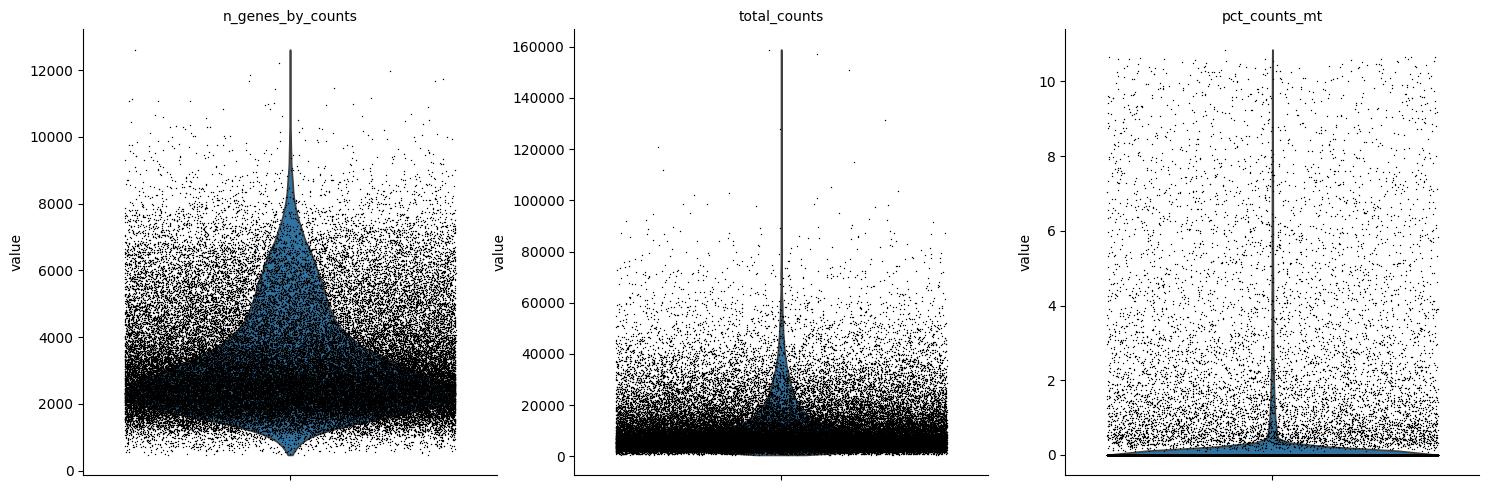

In [ ]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [ ]:
# should edit this based on how vln plots look before
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

In [ ]:
# Saving count data
adata.layers["counts"] = adata.X.copy()
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

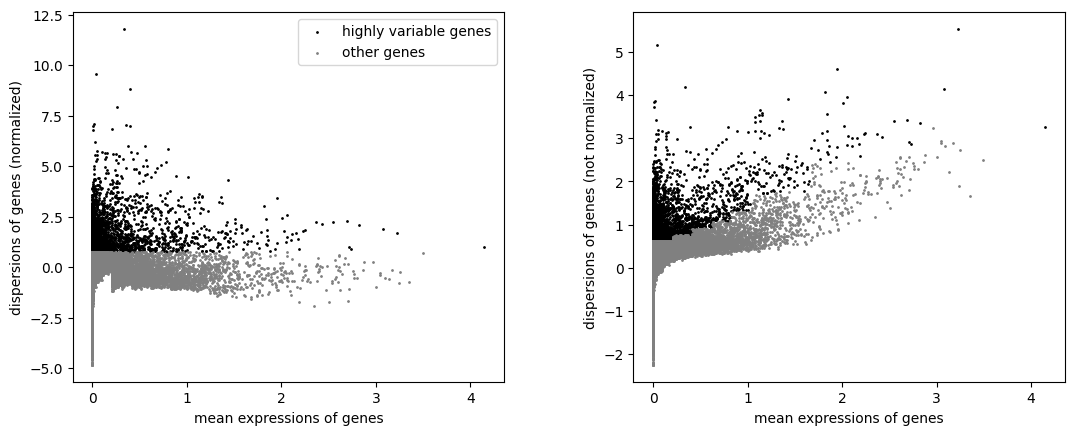

In [ ]:
sc.pp.highly_variable_genes(adata, n_top_genes=4000, batch_key="suspension_type")
sc.pl.highly_variable_genes(adata)

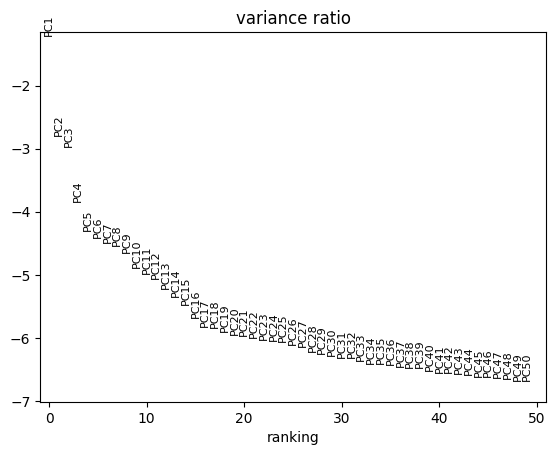

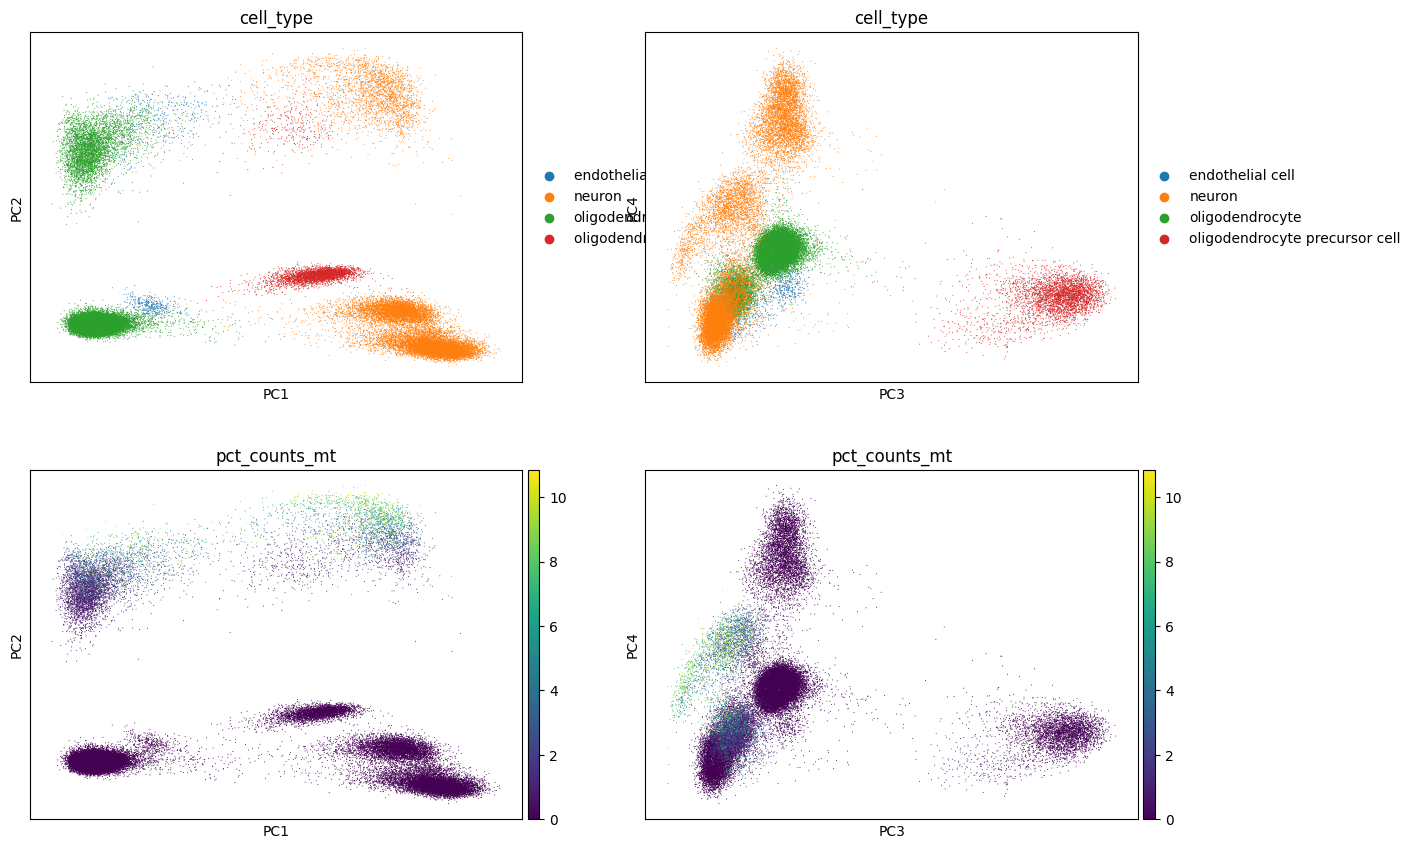

In [ ]:
sc.tl.pca(adata)
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)
sc.pl.pca(
    adata,
    color=["cell_type", "cell_type", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
    size=2,
)

In [ ]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

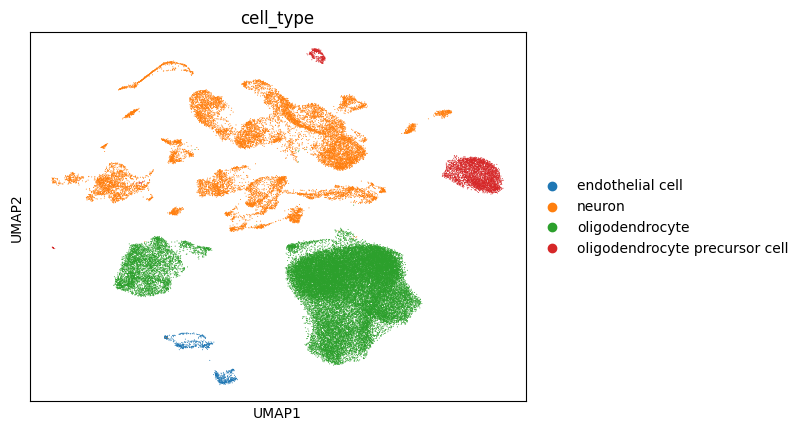

In [ ]:
sc.pl.umap(
    adata,
    color="cell_type",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

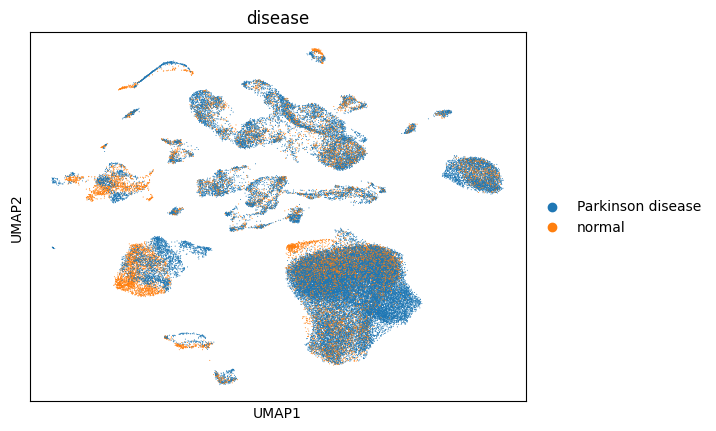

In [ ]:
sc.pl.umap(
    adata,
    color="disease",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

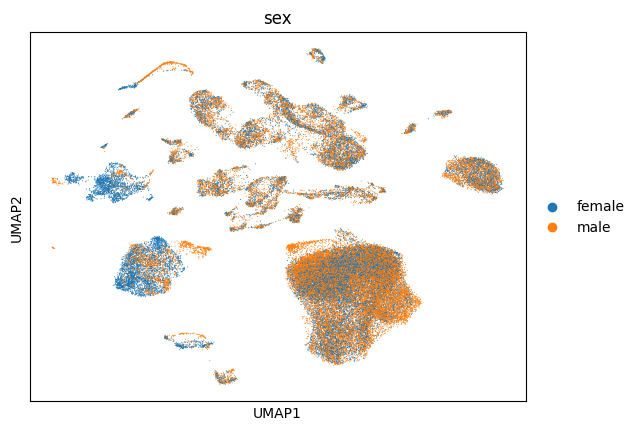

In [ ]:
sc.pl.umap(
    adata,
    color="sex",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

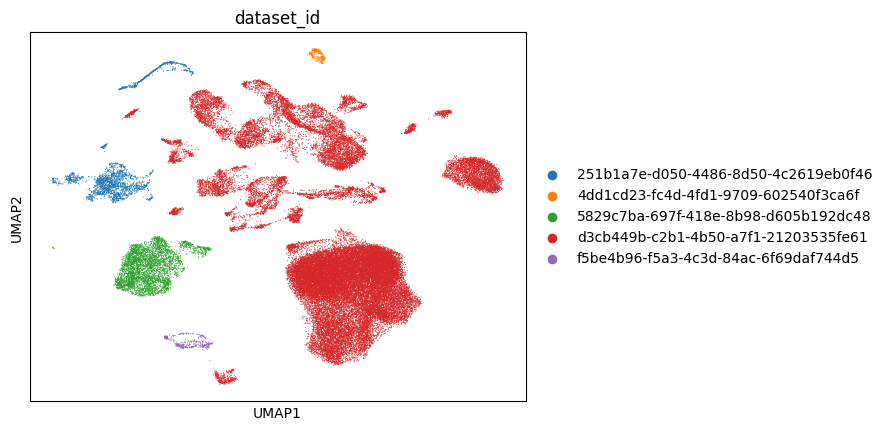

In [ ]:
sc.pl.umap(
    adata,
    color="dataset_id",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

# VAE

In [ ]:
import os
import glob
import math
import random as r
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

from tqdm import tqdm
from scipy.stats import norm
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


# Use highly variable genes only
adata_hvg = adata[:, adata.var['highly_variable']]

# Make feature dataframe
X = pd.DataFrame(adata_hvg.X.toarray(), columns=adata_hvg.var_names, index=adata_hvg.obs_names)

# Add 'sex' as a feature
X['sex'] = adata_hvg.obs['sex'].values

# Encode 'sex' as numeric
X['sex'] = LabelEncoder().fit_transform(X['sex'])

# Define target
y = adata_hvg.obs['disease']

# Encode target (binary classification: Parkinson's disease vs normal)
y = LabelEncoder().fit_transform(y)
X_orig = X.copy()
gene_names = X.columns[:-1]  # all gene names, excluding 'sex' column
# Ensure the data is in float32 format
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sex column as binary values for classification
sex_train = X_train[:, -1]
sex_test = X_test[:, -1]

# Remove 'sex' column from features (X_train, X_test)
X_train = X_train[:, :-1]
X_test = X_test[:, :-1]

# Ensure correct data types
sex_train = np.array(sex_train, dtype=np.float32)
sex_test = np.array(sex_test, dtype=np.float32)


In [ ]:
import numpy as np

# Ensure the input data is in float32 format
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)

# Ensure that the target labels (sex and disease) are in float32 format
sex_train = np.array(sex_train, dtype=np.float32)
sex_test = np.array(sex_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

# Check the data types to ensure they are float32
print(X_train.dtype, sex_train.dtype, y_train.dtype)  # should all be float32


float32 float32 float32


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

# Define input and latent dimensions
input_dim = X_train.shape[1]  # Number of genes (features)
latent_dim = 10  # Latent space dimension

# ----- Encoder -----
inputs = tf.keras.Input(shape=(input_dim,), name="gene_input")
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)

# Latent variables (mean and log-variance)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

# Sampling function
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=tf.shape(z_mean))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling, name="z")([z_mean, z_log_var])

# ----- Decoder -----
decoder_input = layers.Input(shape=(latent_dim,))
x_dec = layers.Dense(64, activation='relu')(decoder_input)
x_dec = layers.Dense(128, activation='relu')(x_dec)
reconstructed = layers.Dense(input_dim, activation='linear', name="reconstructed")(x_dec)
decoder = Model(decoder_input, reconstructed, name="decoder")

# ----- Multi-task Classifiers -----
sex_pred = layers.Dense(1, activation='sigmoid', name="sex_output")(z)
disease_pred = layers.Dense(1, activation='sigmoid', name="disease_output")(z)

# ----- VAE Model -----
reconstructed_output = decoder(z)
vae = Model(inputs, [reconstructed_output, sex_pred, disease_pred], name="vae")


In [ ]:
def vae_loss(inputs, reconstructed_output, z_mean, z_log_var, sex_true, sex_pred, disease_true, disease_pred, alpha=1.0, beta=1.0):
    # Reconstruction loss (Mean Squared Error)
    recon_loss = tf.reduce_mean(tf.square(inputs - reconstructed_output))

    # KL Divergence loss
    kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))

    # Binary cross-entropy loss for sex prediction
    sex_loss = tf.keras.losses.binary_crossentropy(sex_true, sex_pred)

    # Binary cross-entropy loss for disease prediction
    disease_loss = tf.keras.losses.binary_crossentropy(disease_true, disease_pred)

    # Total loss (sum of all components)
    total_loss = recon_loss + kl_loss + alpha * sex_loss + beta * disease_loss
    return total_loss


In [ ]:
# Compile the model
vae.compile(
    optimizer='adam',
    loss={
        'decoder': 'mse',  # Reconstruction loss (mean squared error) for decoder output
        'sex_output': 'binary_crossentropy',  # Sex classification loss
        'disease_output': 'binary_crossentropy'  # Disease classification loss
    },
    metrics={'sex_output': 'accuracy', 'disease_output': 'accuracy'}
)


In [ ]:
# Train the model using the correct targets and data
vae.fit(
    X_train,  # Input features (float32)
    {
        'decoder': X_train,  # Target for reconstructed output (should match input data format)
        'sex_output': sex_train,   # Target for sex classification
        'disease_output': y_train  # Target for disease classification
    },
    validation_data=(X_test, {
        'decoder': X_test,  # Validation target for reconstruction
        'sex_output': sex_test,   # Validation target for sex classification
        'disease_output': y_test  # Validation target for disease classification
    }),
    epochs=30,
    batch_size=32
)


Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - decoder_loss: 0.0680 - disease_output_accuracy: 0.7964 - disease_output_loss: 0.4352 - loss: 1.1288 - sex_output_accuracy: 0.6441 - sex_output_loss: 0.6256 - val_decoder_loss: 0.0519 - val_disease_output_accuracy: 0.8179 - val_disease_output_loss: 0.3741 - val_loss: 0.9718 - val_sex_output_accuracy: 0.6999 - val_sex_output_loss: 0.5457
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - decoder_loss: 0.0517 - disease_output_accuracy: 0.8532 - disease_output_loss: 0.3181 - loss: 0.8760 - sex_output_accuracy: 0.7295 - sex_output_loss: 0.5062 - val_decoder_loss: 0.0506 - val_disease_output_accuracy: 0.8518 - val_disease_output_loss: 0.3212 - val_loss: 0.8854 - val_sex_output_accuracy: 0.7272 - val_sex_output_loss: 0.5137
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - decoder_loss: 0.0503 - disease_output_accuracy: 0.8775 - disease_output_loss: 0.2700 - loss: 0.7613 - sex_output_accuracy: 0.7713 - sex_output_loss: 0

In [ ]:
encoder = Model(inputs, z_mean)
z_train = encoder.predict(X_train)
z_test = encoder.predict(X_test)

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


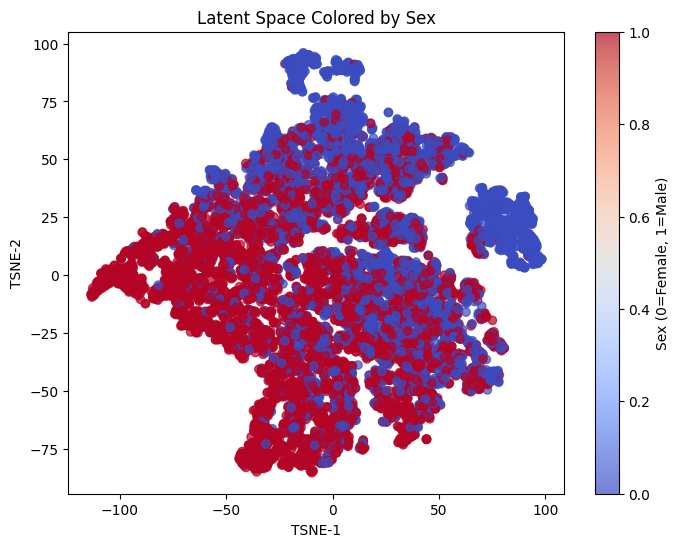

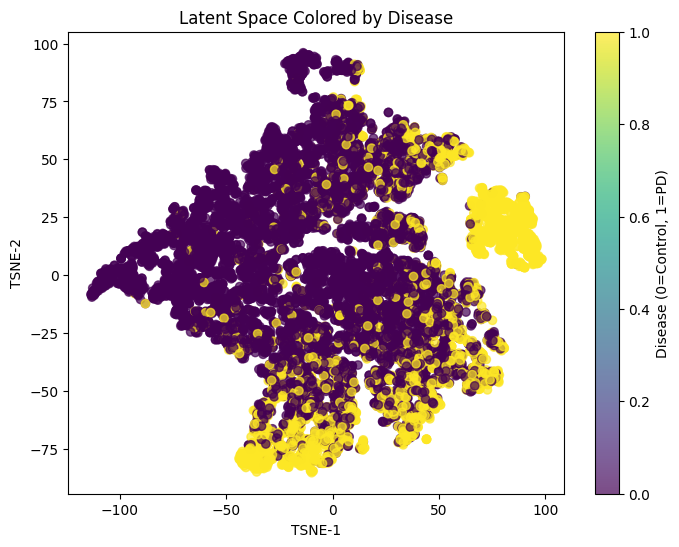

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce to 2D
z_tsne = TSNE(n_components=2, random_state=42).fit_transform(z_test)

# Plot colored by sex
plt.figure(figsize=(8, 6))
plt.scatter(z_tsne[:, 0], z_tsne[:, 1], c=sex_test, cmap='coolwarm', alpha=0.7)
plt.title("Latent Space Colored by Sex")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.colorbar(label='Sex (0=Female, 1=Male)')
plt.show()

# Plot colored by disease
plt.figure(figsize=(8, 6))
plt.scatter(z_tsne[:, 0], z_tsne[:, 1], c=y_test, cmap='viridis', alpha=0.7)
plt.title("Latent Space Colored by Disease")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.colorbar(label='Disease (0=Control, 1=PD)')
plt.show()


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


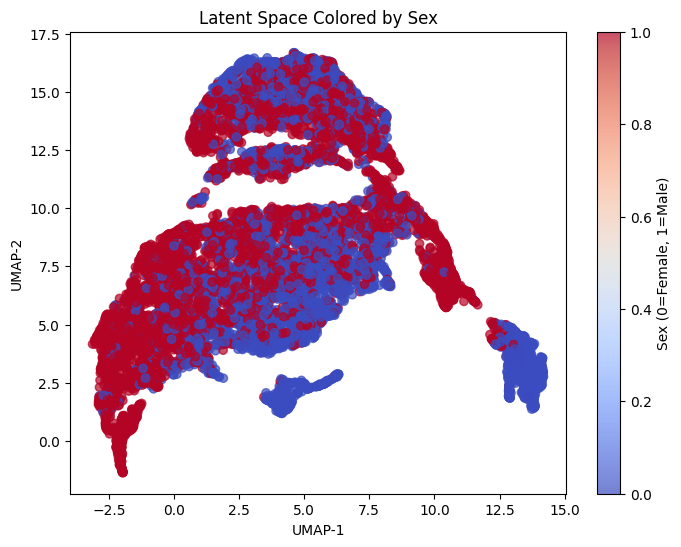

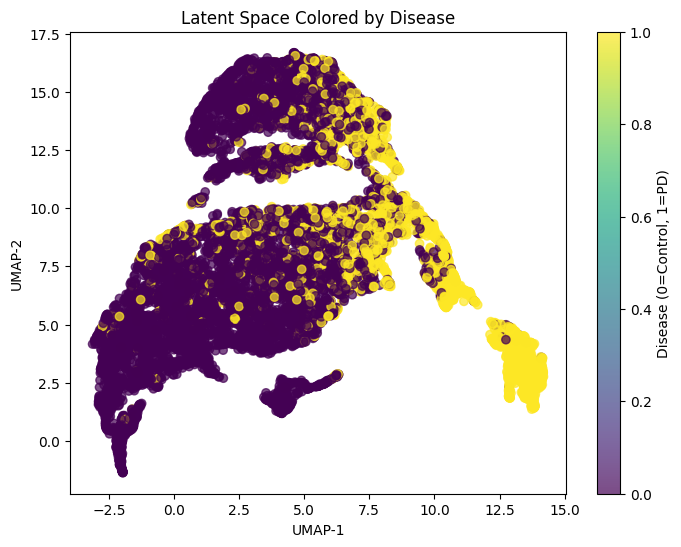

In [ ]:
import umap
import matplotlib.pyplot as plt

# Reduce to 2D using UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
z_umap = umap_model.fit_transform(z_test)

# Plot colored by sex
plt.figure(figsize=(8, 6))
plt.scatter(z_umap[:, 0], z_umap[:, 1], c=sex_test, cmap='coolwarm', alpha=0.7)
plt.title("Latent Space Colored by Sex")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.colorbar(label='Sex (0=Female, 1=Male)')
plt.show()

# Plot colored by disease
plt.figure(figsize=(8, 6))
plt.scatter(z_umap[:, 0], z_umap[:, 1], c=y_test, cmap='viridis', alpha=0.7)
plt.title("Latent Space Colored by Disease")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.colorbar(label='Disease (0=Control, 1=PD)')
plt.show()


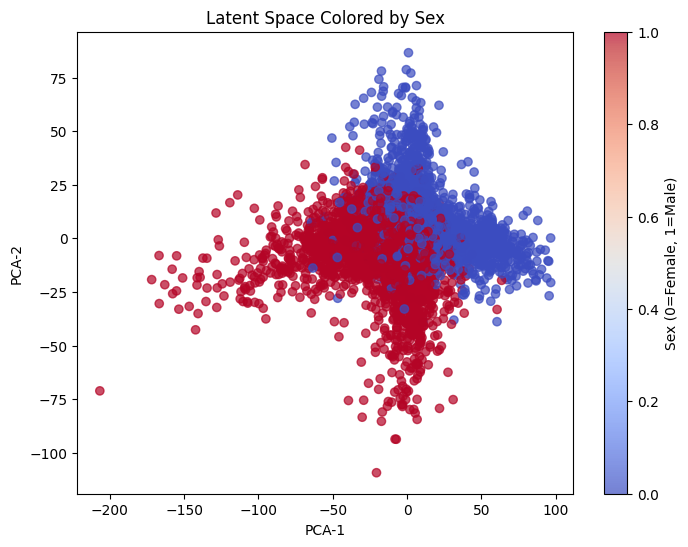

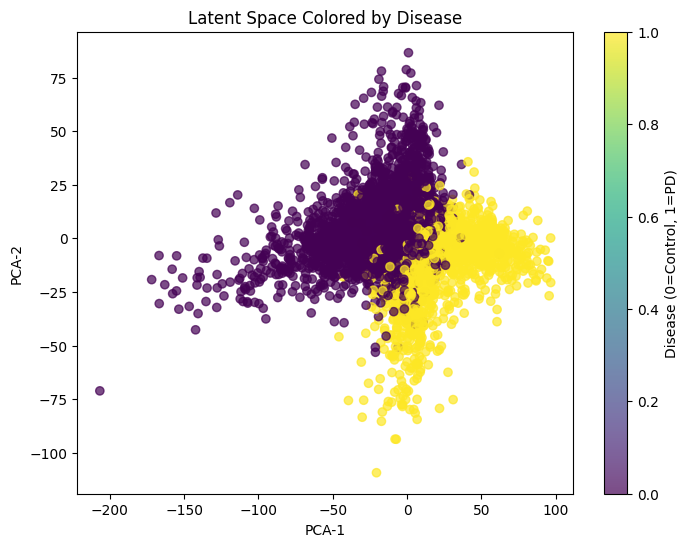

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
z_pca = pca.fit_transform(z_test)

# Plot colored by sex
plt.figure(figsize=(8, 6))
plt.scatter(z_pca[:, 0], z_pca[:, 1], c=sex_test, cmap='coolwarm', alpha=0.7)
plt.title("Latent Space Colored by Sex")
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.colorbar(label='Sex (0=Female, 1=Male)')
plt.show()

# Plot colored by disease
plt.figure(figsize=(8, 6))
plt.scatter(z_pca[:, 0], z_pca[:, 1], c=y_test, cmap='viridis', alpha=0.7)
plt.title("Latent Space Colored by Disease")
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.colorbar(label='Disease (0=Control, 1=PD)')
plt.show()


In [ ]:
# Define latent → classifier branches (reuse weights)
latent_input = tf.keras.Input(shape=(latent_dim,))
sex_branch = vae.get_layer("sex_output")(latent_input)
disease_branch = vae.get_layer("disease_output")(latent_input)

sex_predictor = Model(latent_input, sex_branch)
disease_predictor = Model(latent_input, disease_branch)

In [ ]:
# Create encoder model from VAE
encoder = tf.keras.Model(
    inputs=vae.input,
    outputs=vae.get_layer("z").output  # Latent vector
)

In [ ]:
def find_counterfactual_latent(z_init, decoder, sex_classifier, target_label=1, lr=0.05, steps=100):
    z_cf = tf.Variable(z_init)

    for step in range(steps):
        with tf.GradientTape() as tape:
            # Pass current latent vector through classifier to get predicted sex
            sex_pred = sex_classifier(z_cf)
            # Define target lable for counterfactual
            target_tensor = tf.constant([[target_label]], dtype=tf.float32)
            # Compute binary cross-entropy loss between target and predicted sex
            loss = tf.keras.losses.binary_crossentropy(target_tensor, sex_pred)
            # Regularize
            loss += 0.01 * tf.reduce_sum(tf.square(z_cf - z_init))
        # Compute gradeint w.r.t. z_cf
        grads = tape.gradient(loss, [z_cf])
        # Update z_cf
        z_cf.assign_sub(lr * grads[0])

    return z_cf


In [ ]:
# Define a mini model from z -> sex_output
latent_input = tf.keras.Input(shape=(latent_dim,))
sex_output = vae.get_layer("sex_output")(latent_input)
sex_classifier = tf.keras.Model(latent_input, sex_output)

In [ ]:
# Select a sample (e.g., first from test set)
x_orig = X_test[0:1]
sex_true = sex_test[0]  # original label

# Encode to latent space
z_orig = encoder.predict(x_orig)

# Define target: flip sex (0→1 or 1→0)
target_label = 1 - int(sex_true)

# Get counterfactual latent
z_cf = find_counterfactual_latent(tf.convert_to_tensor(z_orig, dtype=tf.float32), decoder, sex_classifier, target_label=target_label)

# Decode to get counterfactual gene expression
x_cf = decoder.predict(z_cf)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [ ]:
X_orig = pd.DataFrame(X)  # Convert to DataFrame if necessary
X_orig_genes = X_orig.iloc[0, :-1]  # All features except the 'sex' column


In [ ]:
print("Length of gene_names:", len(gene_names))
print("Length of X_orig_genes:", len(X_orig_genes))
print("Length of z_cf:", len(z_cf.numpy().flatten()))

Length of gene_names: 4000
Length of X_orig_genes: 4000
Length of z_cf: 10


In [ ]:
# Decode the counterfactual latent vector (z_cf) into the gene expression space
z_cf_decoded = decoder(z_cf)

# Ensure z_cf_decoded is in the correct shape
z_cf_decoded = z_cf_decoded.numpy().flatten()

# Now, we can create the DataFrame for comparison
df_diff = pd.DataFrame({
    'gene': gene_names,  # Gene names
    'original': X_orig_genes.values,  # Original gene expression values for the first sample
    'counterfactual': z_cf_decoded  # Decoded counterfactual gene expression values
})

# Calculate the difference between the original and counterfactual gene expression
df_diff['difference'] = df_diff['counterfactual'] - df_diff['original']

# Sort by the difference and display the top 10 changes
df_diff_sorted = df_diff.sort_values(by='difference', ascending=False)
print(df_diff_sorted.head(10))


        gene  original  counterfactual  difference
1501  RBFOX1   0.00000        3.669439    3.669439
2045   CSMD1   0.00000        3.619606    3.619606
2012   NRXN1   0.00000        3.329041    3.329041
1017    SYT1   0.00000        3.321660    3.321660
2088  KCNIP4   0.57526        3.752305    3.177045
2053   OPCML   0.00000        3.015069    3.015069
1977   DPP10   0.00000        2.953060    2.953060
1982  LRRTM4   0.00000        2.923965    2.923965
1935  DLGAP1   0.00000        2.890463    2.890463
2068   RALYL   0.00000        2.808467    2.808467


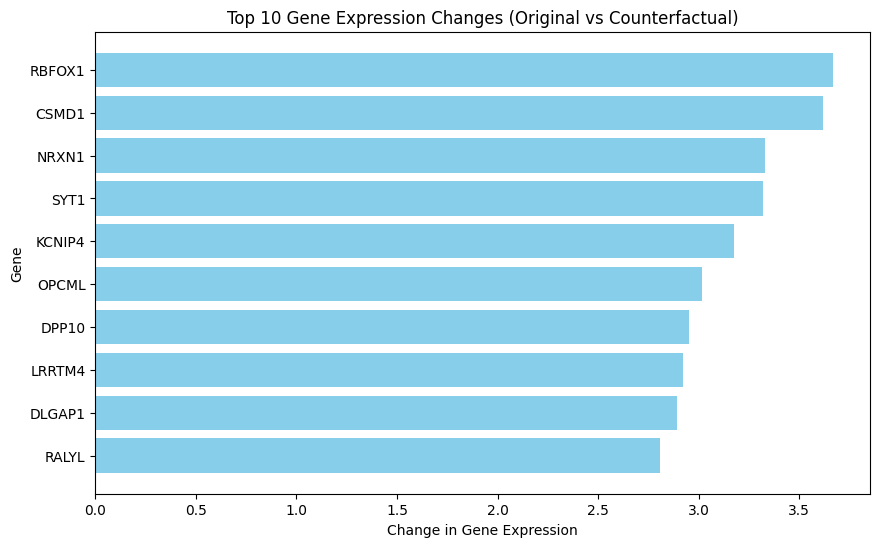

In [ ]:
import matplotlib.pyplot as plt

# Plot the top 10 genes with the largest changes in expression
top_10_changes = df_diff_sorted.head(10)

# Create a bar plot for the top 10 gene changes
plt.figure(figsize=(10, 6))
plt.barh(top_10_changes['gene'], top_10_changes['difference'], color='skyblue')
plt.xlabel('Change in Gene Expression')
plt.ylabel('Gene')
plt.title('Top 10 Gene Expression Changes (Original vs Counterfactual)')
plt.gca().invert_yaxis()  # Largest changes at the top
plt.show()
